<a href="https://colab.research.google.com/github/WMaia9/Deep-Learning-Specialization/blob/main/regressao_mao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de Regressão

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 1 Regressão linear com uma variável

Vamos implementar a regressão linear com uma variável para prever o preço de uma partamento. 
O arquivo `base_1ah.csv` contém o conjunto de dados para nosso problema de regressão linear. Iremos utilizar a coluna SalePrice que é o valor que o imóvel é negociado e LotArea que é o tamanho do imovél.

In [ ]:
df = pd.read_csv('base_1ah.csv')

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
cols_nan = df.columns[df.isna().any()].tolist()
print('Columns com nan: \n' + str(cols_nan) + '\n')

Columns com nan: 
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']



In [ ]:
df.dropna(subset = ["LotFrontage"], inplace=True)

### 1.1 Traçando os dados

Antes de iniciar qualquer tarefa, geralmente é útil compreender os dados visualizando-os. Para este conjunto de dados, podemos usar um gráfico de dispersão para visualizar os dados, uma vez que ele tem apenas duas propriedades para representar (lucro e população).

In [ ]:
X, y = df['LotArea'].to_numpy(), df['SalePrice'].to_numpy()
m = y.size

In [ ]:
def plotData(x, y):
    
    """
    Plota os pontos de dados x e y em uma nova figura. Plota os dados
     aponta e dá aos eixos da figura rótulos de população e lucro.
    
     Parâmetros
     ----------
     x: array_like
         Valores de pontos de dados para o eixo x.

     y: array_like
         Valores de pontos de dados para o eixo y. Observe que x e y devem ter o mesmo tamanho.
    """
    
    fig = pyplot.figure()
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Valores do imóvel')
    pyplot.xlabel('Tamanho do imóvel')

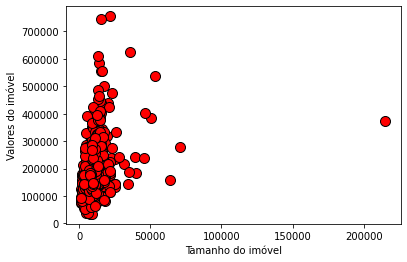

In [ ]:
plotData(X, y)

<a id="section2"> </a>
### 2.2 Gradiente decendente

Nesta parte, ajustaremos os parâmetros de regressão linear $ \theta $ ao nosso conjunto de dados usando gradiente descendente.

#### 2.2.1 Atualizar Equações

O objetivo da regressão linear é minimizar a função de custo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

onde a hipótese $ h_ \ theta (x) $ é dada pelo modelo linear
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Lembre-se de que os parâmetros do nosso modelo são os valores $ \theta_j $. Estes são
os valores que nós ajustaremos para minimizar o custo $ J (\theta) $. Uma maneira de fazer isso é
use o algoritmo de gradiente decendente em lote. Na descida do gradiente em lote, cada
iteração realiza a atualização

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{atualizar simultaneamente } \theta_j \text{ para todo } j$$

A cada passo da descida do gradiente, seus parâmetros $ \ theta_j $ se aproximam dos valores ótimos que atingirão o menor custo J ($\theta$).

In [ ]:
# Adicionando uma coluna de 1 a X. A pilha de funções numpy une arrays ao longo de um determinado eixo.
# O primeiro eixo (eixo = 0) se refere às linhas (exemplos de treinamento)
# e o segundo eixo (eixo = 1) refere-se a colunas (recursos).
X = np.stack([np.ones (m), X], axis=1)

<a id="section2"> </a>
#### 2.2.3 Calculando o custo $ J (\theta) $

Conforme nós realizamos a descida do gradiente para aprender a minimizar a função de custo $ J (\theta) $, é útil monitorar a convergência calculando o custo. Nesta seção, nós implementaremos uma função para calcular $J (\theta)$ para que possa verificar a convergência de sua implementação de gradiente descendente.

In [ ]:
def computeCost(X, y, theta):
    """
     Calcule o custo da regressão linear. Calcula o custo de usar theta como o
     parâmetro para regressão linear para ajustar os pontos de dados em X e y.
    
     Parâmetros
     ----------
     X: array_like
         O conjunto de dados de entrada de forma (m x n + 1), onde m é o número de exemplos,
         e n é o número de recursos. Assumimos um vetor de um já
         anexado aos recursos, portanto, temos n + 1 colunas.
    
     y: array_like
         Os valores da função em cada ponto de dados. Este é um vetor de
         forma (m,).
    
     theta: array_like
         Os parâmetros da função de regressão. Este é um vetor de
         forma (n + 1,).
    
     Devoluções
     -------
     J: float
         O valor da função de custo de regressão.
    """
    m = y.size 
    J = 0
    hx = X @ theta
    J = (1/(2*m)) * sum((hx - y)**2)
    return J

In [ ]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('Com theta = [0, 0] \nCusto computado = %.2f' % J)

# further testing of the cost function
J = computeCost(X, y, theta=np.array([-1, 2]))
print('Com theta = [-1, 2]\nCusto computado = %.2f' % J)

Com theta = [0, 0] 
Custo computado = 19812994300.51
Com theta = [-1, 2]
Custo computado = 16127538082.50


In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Executa a descida do gradiente para aprender `theta`. Atualiza theta tomando `num_iters`
     etapas de gradiente com taxa de aprendizagem `alfa`.
    
     Parâmetros
     ----------
     X: array_like
         O conjunto de dados de entrada de forma (m x n + 1).
    
     y: array_like
         Valor em determinados recursos. Um vetor de forma (m,).
    
     theta: array_like
         Valores iniciais para os parâmetros de regressão linear.
         Um vetor de forma (n + 1,).
    
     alpha: float
         A taxa de aprendizagem.
    
     num_iters: int
         O número de iterações para a descida do gradiente.
    
     Devoluções
     -------
     theta: array_like
         Os parâmetros de regressão linear aprendidos. Um vetor de forma (n + 1,).
    
     J_history: list
         Uma lista python para os valores da função de custo após cada iteração.
    """

    m = y.shape[0]  # número de exemplos de treinamento
    
    # faça uma cópia de theta, para evitar alterar a matriz original, uma vez que matrizes numpy
    # são passados por referência a funções
    theta = theta.copy()
    
    J_history = [] # Use uma lista python para economizar custos em cada iteração
    
    for i in range(num_iters):
        hx = X @ theta
        theta0 = theta[0] - (alpha/m) * np.sum((hx - y) * X[:, 0])
        theta1 = theta[1] - (alpha/m) * np.sum((hx - y) * X[:, 1])
        theta = [theta0, theta1]


        # salva o curto J em cada iteração
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

In [ ]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.000000001

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrado pela decida do Gradiente: {:.4f}, {:.4f}'.format(*theta))

Theta encontrado pela decida do Gradiente: 0.0870, 12.3909


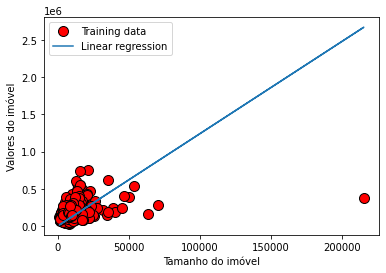

In [ ]:
# plot the linear fit
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Training data', 'Linear regression']);